<a href="https://colab.research.google.com/github/AlteredCarbondioxide/Emergency-room-prediction-/blob/main/ER_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate date range
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start_date, end_date)

# Generate random ER admission numbers with some realistic patterns
np.random.seed(42)
er_admissions = np.random.randint(50, 200, len(date_range))

# Introduce spikes for flu season (Jan-Feb & Oct-Dec)
flu_season = date_range.month.isin([1, 2, 10, 11, 12]).astype(int)
er_admissions += flu_season * np.random.randint(10, 50, len(date_range))

# Add weather-related factors
temperature = np.random.randint(0, 40, len(date_range))  # Random temperature in °C
air_pollution = np.random.randint(30, 150, len(date_range))  # Air Quality Index (higher = worse)

# Add special event factors
holidays = np.random.choice([0, 1], size=len(date_range), p=[0.9, 0.1])  # 10% chance of holiday
sports_events = np.random.choice([0, 1], size=len(date_range), p=[0.95, 0.05])  # 5% chance of sports event

# Combine into a DataFrame
df = pd.DataFrame({
    "Date": date_range,
    "ER_Admissions": er_admissions,
    "Temperature": temperature,
    "Air_Pollution_Index": air_pollution,
    "Flu_Season": flu_season,
    "Holiday": holidays,
    "Sports_Event": sports_events
})

# Save to CSV
df.to_csv("synthetic_er_data.csv", index=False)

print("Dataset generated and saved as 'synthetic_er_data.csv'.")


Dataset generated and saved as 'synthetic_er_data.csv'.


In [ ]:
from google.colab import files
files.download("synthetic_er_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Upload file manually in Colab
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("synthetic_er_data.csv")

# Display first few rows
df.head()


Saving synthetic_er_data.csv to synthetic_er_data.csv


,Date,ER_Admissions,Temperature,Air_Pollution_Index,Flu_Season,Holiday,Sports_Event
0,2023-01-01,162,25,83,1,0,0
1,2023-01-02,185,33,114,1,0,0
2,2023-01-03,105,13,43,1,0,0
3,2023-01-04,190,25,124,1,0,0
4,2023-01-05,170,26,84,1,0,0


In [ ]:
# Get dataset info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Get basic statistics
print("\nDataset Summary:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 365 non-null    object
 1   ER_Admissions        365 non-null    int64 
 2   Temperature          365 non-null    int64 
 3   Air_Pollution_Index  365 non-null    int64 
 4   Flu_Season           365 non-null    int64 
 5   Holiday              365 non-null    int64 
 6   Sports_Event         365 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 20.1+ KB

Missing Values:
 Date                   0
ER_Admissions          0
Temperature            0
Air_Pollution_Index    0
Flu_Season             0
Holiday                0
Sports_Event           0
dtype: int64

Dataset Summary:
        ER_Admissions  Temperature  Air_Pollution_Index  Flu_Season  \
count     365.000000   365.000000           365.000000  365.000000   
mean      139.301370    20.054795      

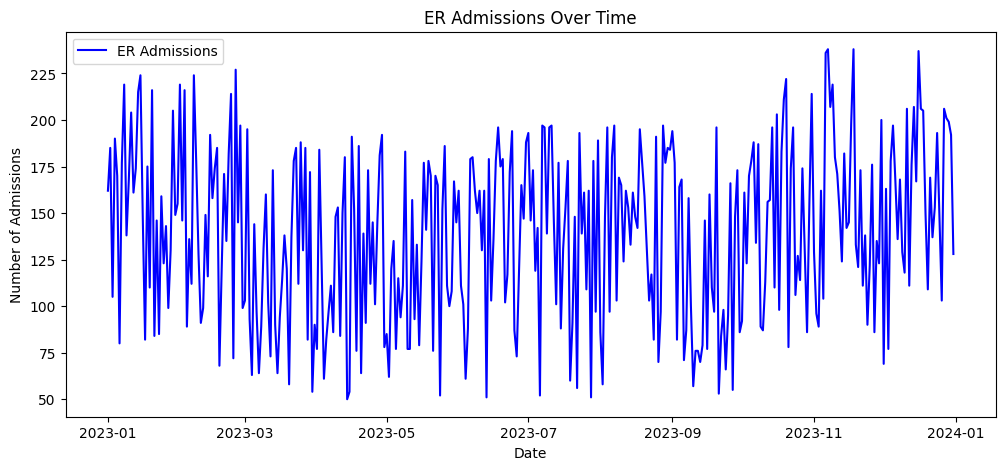

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plot ER admissions over time
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["ER_Admissions"], label="ER Admissions", color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Admissions")
plt.title("ER Admissions Over Time")
plt.legend()
plt.show()


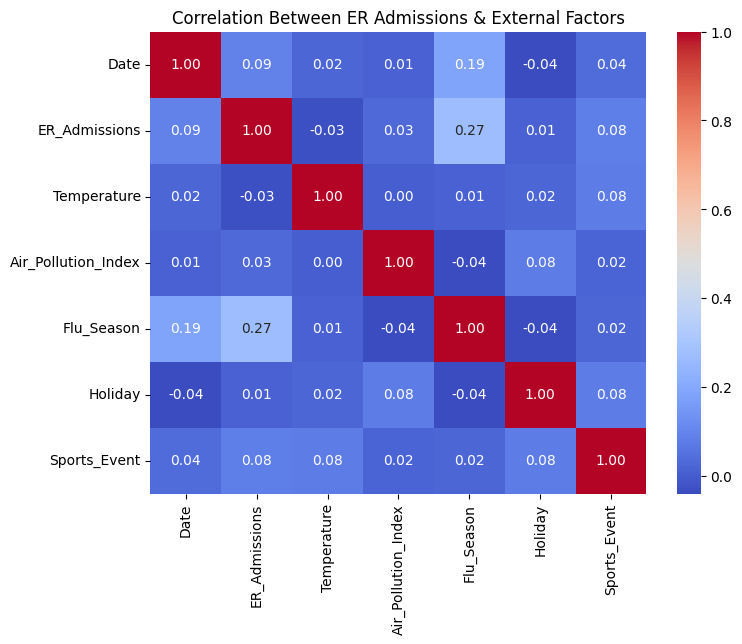

In [ ]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between ER Admissions & External Factors")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("synthetic_er_data.csv")

# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Select features and target variable
features = ["Temperature", "Air_Pollution_Index", "Flu_Season", "Holiday", "Sports_Event"]
target = "ER_Admissions"

X = df[features]
y = df[target]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [-0.0631171   0.05023325 20.6021442  -4.0673963  16.29638265]
Model Intercept: 128.39762162236815


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 36.32
Mean Squared Error: 1845.95
R² Score: 0.16


In [ ]:
# Example: Predict ER admissions for new conditions
new_data = pd.DataFrame({
    "Temperature": [30],
    "Air_Pollution_Index": [100],
    "Flu_Season": [1],
    "Holiday": [0],
    "Sports_Event": [1]
})

predicted_er_admissions = model.predict(new_data)
print(f"Predicted ER Admissions: {predicted_er_admissions[0]:.0f}")


Predicted ER Admissions: 168


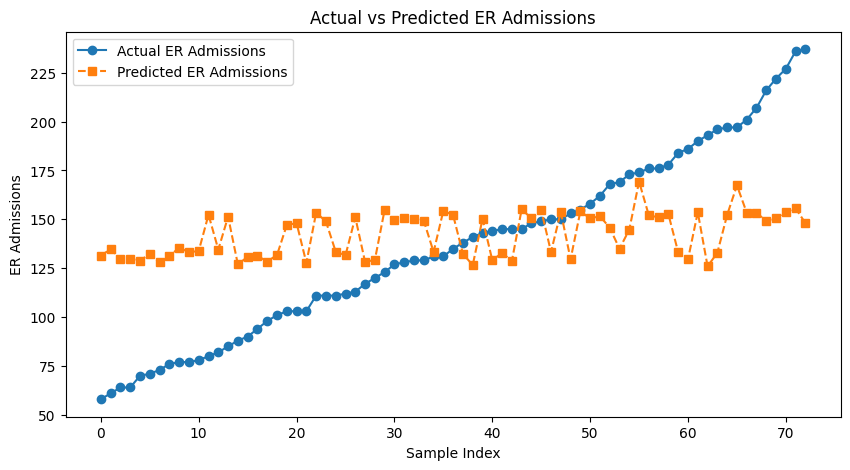

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort values by actual admissions for a clearer plot
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test_sorted, label="Actual ER Admissions", marker='o', linestyle="-")
plt.plot(y_pred_sorted, label="Predicted ER Admissions", marker='s', linestyle="--")
plt.xlabel("Sample Index")
plt.ylabel("ER Admissions")
plt.title("Actual vs Predicted ER Admissions")
plt.legend()
plt.show()


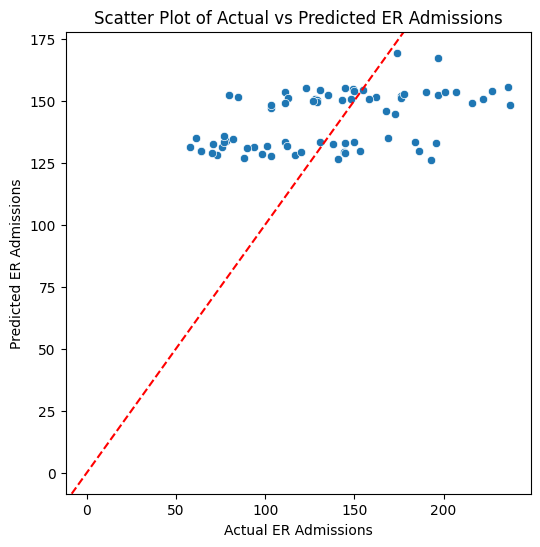

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual ER Admissions")
plt.ylabel("Predicted ER Admissions")
plt.title("Scatter Plot of Actual vs Predicted ER Admissions")
plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Ideal line
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [ ]:
df["Day_of_Week"] = df["Date"].dt.dayofweek  # Monday = 0, Sunday = 6


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}


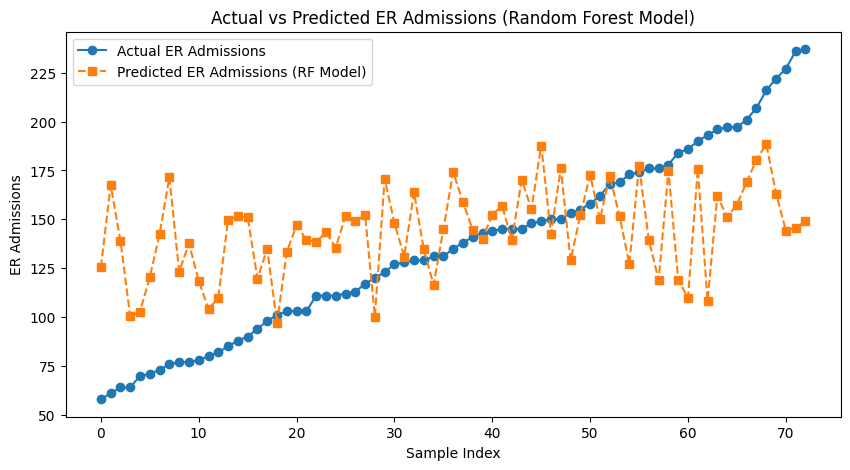

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort values for a clearer plot
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_rf_sorted = y_pred_rf[sorted_indices]

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test_sorted, label="Actual ER Admissions", marker='o', linestyle="-")
plt.plot(y_pred_rf_sorted, label="Predicted ER Admissions (RF Model)", marker='s', linestyle="--")
plt.xlabel("Sample Index")
plt.ylabel("ER Admissions")
plt.title("Actual vs Predicted ER Admissions (Random Forest Model)")
plt.legend()
plt.show()


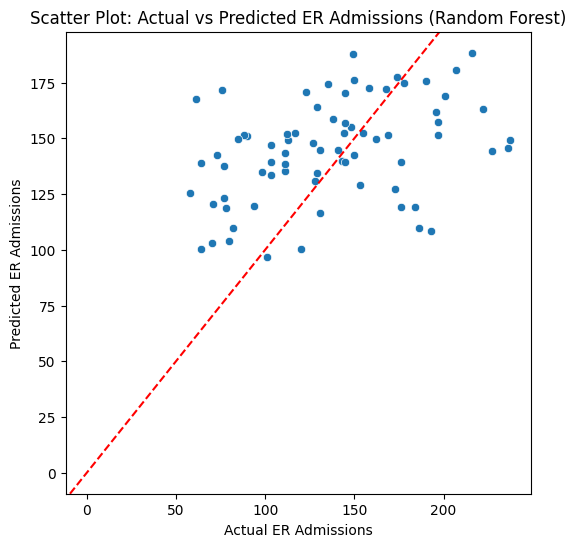

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual ER Admissions")
plt.ylabel("Predicted ER Admissions")
plt.title("Scatter Plot: Actual vs Predicted ER Admissions (Random Forest)")
plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Ideal line
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("synthetic_er_data.csv")

# Convert 'Date' to datetime and add Day of the Week as a feature
df["Date"] = pd.to_datetime(df["Date"])
df["Day_of_Week"] = df["Date"].dt.dayofweek  # Monday = 0, Sunday = 6

# Select features and target variable
features = ["Temperature", "Air_Pollution_Index", "Flu_Season", "Holiday", "Sports_Event", "Day_of_Week"]
target = "ER_Admissions"

X = df[features]
y = df[target]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


XGBoost Model Performance:
Mean Absolute Error: 37.54
Mean Squared Error: 2312.41
R² Score: -0.06


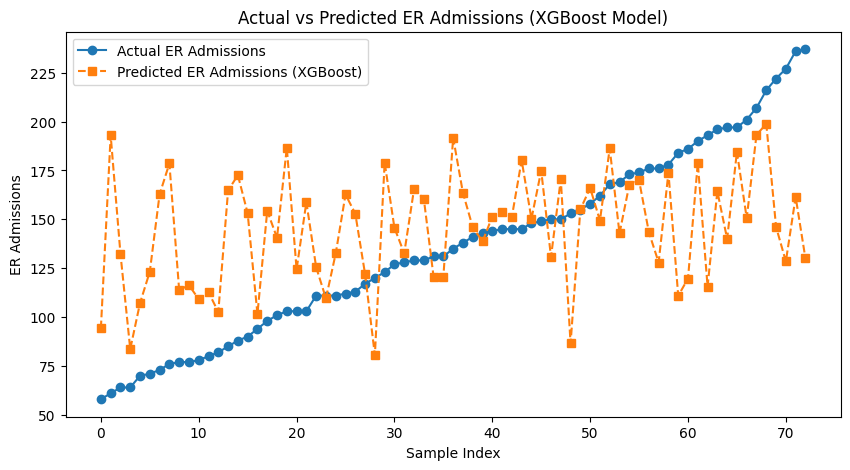

In [ ]:
# Sort values for a clearer plot
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_xgb_sorted = y_pred_xgb[sorted_indices]

# Line Plot for Actual vs Predicted Values
plt.figure(figsize=(10,5))
plt.plot(y_test_sorted, label="Actual ER Admissions", marker='o', linestyle="-")
plt.plot(y_pred_xgb_sorted, label="Predicted ER Admissions (XGBoost)", marker='s', linestyle="--")
plt.xlabel("Sample Index")
plt.ylabel("ER Admissions")
plt.title("Actual vs Predicted ER Admissions (XGBoost Model)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define number of records
num_days = 10000  # Increase for a larger dataset

# Generate synthetic date range
date_range = pd.date_range(start="2015-01-01", periods=num_days, freq="D")

# Generate random external factors
temperature = np.random.uniform(low=-10, high=40, size=num_days)  # Temperature in Celsius
air_pollution_index = np.random.uniform(low=20, high=200, size=num_days)  # Pollution level
flu_season = np.random.choice([0, 1], size=num_days, p=[0.7, 0.3])  # 30% chance of flu season
holiday = np.random.choice([0, 1], size=num_days, p=[0.9, 0.1])  # 10% chance of holiday
sports_event = np.random.choice([0, 1], size=num_days, p=[0.8, 0.2])  # 20% chance of a major event
day_of_week = [date.weekday() for date in date_range]  # Monday = 0, Sunday = 6

# Generate synthetic ER admissions based on factors
er_admissions = (
    50 +  # Base admissions
    (temperature * 0.5) +  # Higher temperatures slightly increase ER visits
    (air_pollution_index * 0.3) +  # Higher pollution leads to more respiratory cases
    (flu_season * 15) +  # Flu season spikes ER visits
    (holiday * 10) +  # Holidays cause increases in ER visits
    (sports_event * 8) +  # Sports events cause some additional ER visits
    (np.array(day_of_week) * 2) +  # Weekend effect (higher admissions on weekends)
    np.random.normal(scale=10, size=num_days)  # Add noise for realism
).astype(int)

# Create DataFrame
df_large = pd.DataFrame({
    "Date": date_range,
    "Temperature": temperature,
    "Air_Pollution_Index": air_pollution_index,
    "Flu_Season": flu_season,
    "Holiday": holiday,
    "Sports_Event": sports_event,
    "Day_of_Week": day_of_week,
    "ER_Admissions": er_admissions
})

# Save dataset
df_large.to_csv("large_er_dataset.csv", index=False)
print("Large dataset created with", len(df_large), "records.")


Large dataset created with 10000 records.


In [ ]:
# Load dataset
df = pd.read_csv("large_er_dataset.csv")

# Convert 'Date' to datetime and add Day of the Week as a feature
df["Date"] = pd.to_datetime(df["Date"])
df["Day_of_Week"] = df["Date"].dt.dayofweek  # Monday = 0, Sunday = 6

# Select features and target variable
features = ["Temperature", "Air_Pollution_Index", "Flu_Season", "Holiday", "Sports_Event", "Day_of_Week"]
target = "ER_Admissions"

X = df[features]
y = df[target]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


XGBoost Model Performance:
Mean Absolute Error: 8.25
Mean Squared Error: 107.13
R² Score: 0.77


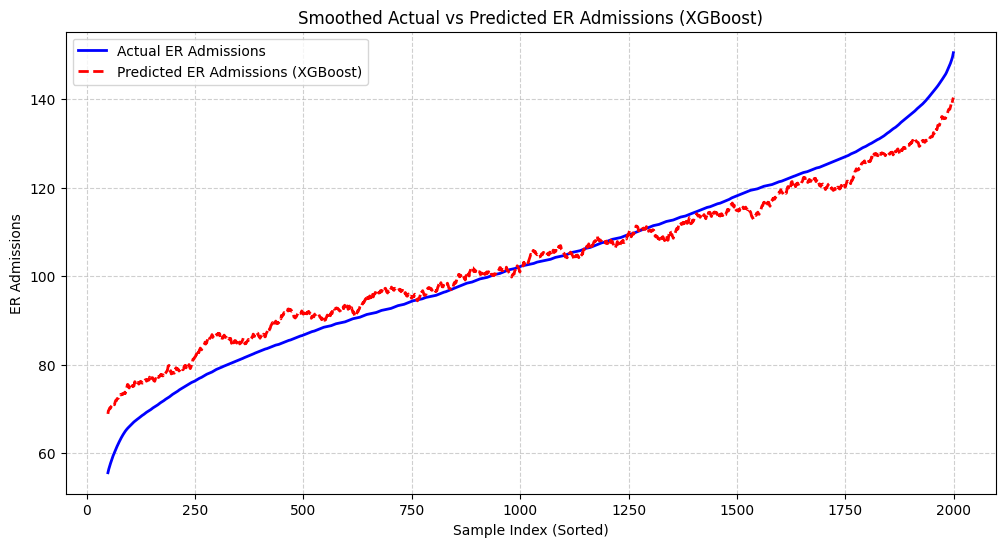

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Sort values for a clearer line plot
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_xgb_sorted = y_pred_xgb[sorted_indices]

# Apply rolling average to smooth out variations (adjust window size as needed)
window_size = 50  # Adjust for readability
y_test_smooth = pd.Series(y_test_sorted).rolling(window=window_size).mean()
y_pred_smooth = pd.Series(y_pred_xgb_sorted).rolling(window=window_size).mean()

# Line Plot (Smoothed)
plt.figure(figsize=(12,6))
plt.plot(y_test_smooth, label="Actual ER Admissions", linestyle="-", linewidth=2, color='blue')
plt.plot(y_pred_smooth, label="Predicted ER Admissions (XGBoost)", linestyle="--", linewidth=2, color='red')
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("ER Admissions")
plt.title("Smoothed Actual vs Predicted ER Admissions (XGBoost)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

